# Avoid Overfitting by Early Stopping With XGBoost

Overfitting is a problem with sophisticated non-linear learning algorithms like gradient boosting.

Here you will discover how you can use early stopping to limit overfitting with XGBoost in Python.

By the end you will know:

- About early stopping as an approach to reducing overfitting of training data?
- How to monitor the performance of an XGBoost model during training and plot the learning curve?
- How to use early stopping to prematurely stop the training of an XGBoost model at an optimal epoch?

## Early Stopping to Avoid Overfitting

[Early stopping](https://en.wikipedia.org/wiki/Early_stopping) is an approach to training complex machine learning models to avoid overfitting.

It works by monitoring the performance of the model that is being trained on a separate test dataset and stopping the training procedure once the performance on the test dataset has not improved after a fixed number of training iterations.

It avoids overfitting by attempting to automatically select the inflection point where performance on the test dataset starts to decrease while performance on the training dataset continues to improve as the model starts to overfit.

The performance measure may be the loss function that is being optimized to train the model (such as logarithmic loss), or an external metric of interest to the problem in general (such as classification accuracy).

## Monitoring Training Performance With XGBoost

The XGBoost model can evaluate and report on the performance on a test set for the the model during training.

It supports this capability by specifying both an test dataset and an evaluation metric on the call to model.fit() when training the model and specifying verbose output.

For example, we can report on the binary classification error rate (“error“) on a standalone test set (eval_set) while training an XGBoost model as follows:

<pre>
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
</pre>

XGBoost supports a suite of evaluation metrics not limited to:

“rmse” for root mean squared error.
“mae” for mean absolute error.
“logloss” for binary logarithmic loss and “mlogloss” for multi-class log loss (cross entropy).
“error” for classification error.
“auc” for area under ROC curve.
The full list is provided in the [“Learning Task Parameters”](http://xgboost.readthedocs.io/en/latest//parameter.html) section of the XGBoost Parameters webpage.

For example, we can demonstrate how to track the performance of the training of an XGBoost model on the Pima Indians onset of diabetes [dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes), available from the UCI Machine Learning Repository.

The full example is provided below:

In [7]:
# monitor training performance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# fit model no training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.259843
[1]	validation_0-error:0.26378
[2]	validation_0-error:0.26378
[3]	validation_0-error:0.255906
[4]	validation_0-error:0.255906
[5]	validation_0-error:0.26378
[6]	validation_0-error:0.23622
[7]	validation_0-error:0.255906
[8]	validation_0-error:0.248031
[9]	validation_0-error:0.248031
[10]	validation_0-error:0.248031
[11]	validation_0-error:0.232283
[12]	validation_0-error:0.228346
[13]	validation_0-error:0.228346
[14]	validation_0-error:0.228346
[15]	validation_0-error:0.228346
[16]	validation_0-error:0.228346
[17]	validation_0-error:0.228346
[18]	validation_0-error:0.224409
[19]	validation_0-error:0.232283
[20]	validation_0-error:0.232283
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.232283
[24]	validation_0-error:0.228346
[25]	validation_0-error:0.228346
[26]	validation_0-error:0.224409
[27]	validation_0-error:0.224409
[28]	validation_0-error:0.228346
[29]	validation_0-error:0.232283
[30]	validation_0-error:0.

Running this example trains the model on 67% of the data and evaluates the model every training epoch on a 33% test dataset.

The classification error is reported each iteration and finally the classification accuracy is reported at the end.

The output is provided above, truncated for brevity. We can see that the classification error is reported each training iteration (after each boosted tree is added to the model).

Reviewing all of the output, we can see that the model performance on the test set sits flat and even gets worse towards the end of training.

## Evaluate XGBoost Models With Learning Curves

We can retrieve the performance of the model on the evaluation dataset and plot it to get insight into how learning unfolded while training.

We provide an array of X and y pairs to the eval_metric argument when fitting our XGBoost model. In addition to a test set, we can also provide the training dataset. This will provide a report on how well the model is performing on both training and test sets during training.

For example:

<pre>
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
</pre>

In addition, the performance of the model on each evaluation set is stored and made available by the model after training by calling the **model.evals_result()** function. This returns a dictionary of evaluation datasets and scores, for example:

<pre>
results = model.evals_result()
print(results)
</pre>

This will print results like the following (truncated for brevity):

<pre>
{
	'validation_0': {'error': [0.259843, 0.26378, 0.26378, ...]},
	'validation_1': {'error': [0.22179, 0.202335, 0.196498, ...]}
}
</pre>

Each of ‘validation_0‘ and ‘validation_1‘ correspond to the order that datasets were provided to the **eval_set** argument in the call to **fit()**.

A specific array of results, such as for the first dataset and the error metric can be accessed as follows:

<pre>
results['validation_0']['error']
</pre>

Additionally, we can specify more evaluation metrics to evaluate and collect by providing an array of metrics to the eval_metric argument of the fit() function.

We can then use these collected performance measures to create a line plot and gain further insight into how the model behaved on train and test datasets over training epochs.

Below is the complete code example showing how the collected results can be visualized on a line plot.

Accuracy: 77.95%


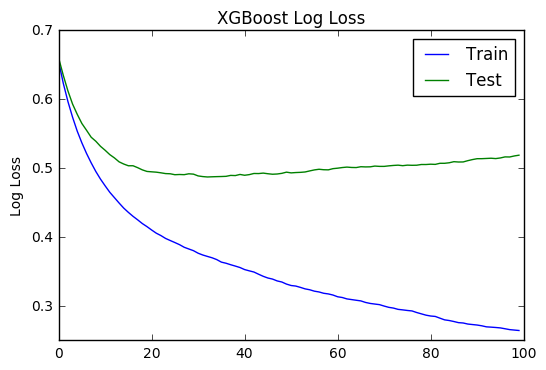

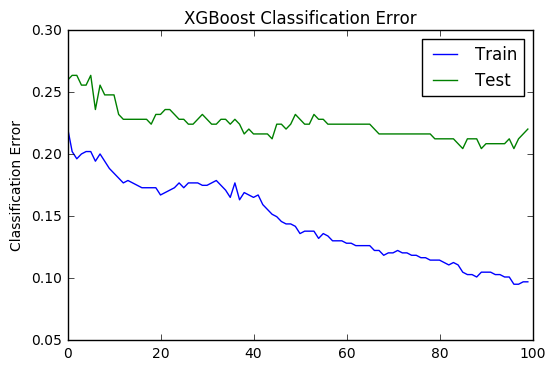

In [8]:
# plot learning curve
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

Running this code reports the classification error on both the train and test datasets each epoch. We can turn this off by setting verbose=False (the default) in the call to the fit() function.

Two plots are created. The first shows the logarithmic loss of the XGBoost model for each epoch on the training and test datasets.

The second plot shows the classification error of the XGBoost model for each epoch on the training and test datasets.

From reviewing the logloss plot, it looks like there is an opportunity to stop the learning early, perhaps somewhere around epoch 20 to epoch 40.

We see a similar story for classification error, where error appears to go back up at around epoch 40.

## Early Stopping With XGBoost

XGBoost supports early stopping after a fixed number of iterations.

In addition to specifying a metric and test dataset for evaluation each epoch, you must specify a window of the number of epochs over which no improvement is observed. This is specified in the **early_stopping_rounds parameter**.

For example, we can check for no improvement in logarithmic loss over the 10 epochs as follows:

<pre>
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
</pre>

If multiple evaluation datasets or multiple evaluation metrics are provided, then early stopping will use the last in the list.

Below provides a full example for completeness with early stopping.

In [9]:
# early stopping
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.612239
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.51977
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


We can see that the model stopped training at epoch 42 (close to what we expected by our manual judgment of learning curves) and that the model with the best loss was observed at epoch 32.

It is generally a good idea to select the **early_stopping_rounds** as a reasonable function of the total number of training epochs (10% in this case) or attempt to correspond to the period of inflection points as might be observed on a plots of learning curves.